<a href="https://colab.research.google.com/github/wanjas1/Sentiment-Analysis-of-Coffee-Maker-Reviews-Using-Na-ve-Bayes/blob/main/Sentiment_Analysis_of_Coffee_Maker_Reviews_Using_Na%C3%AFve_Bayes.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# @title Full Name { run: "auto" }
Name = 'Sharomith Wanja' # @param {type:"string", placeholder:"Enter Full Name"}
print("Name:", Name)

Name: Sharomith Wanja


# **Sentiment Analysis of Coffee Maker Reviews Using Naïve Bayes**

**Project Overview**

Customer sentiment is a key driver of brand perception and product improvement. DeLonghi, a coffee maker manufacturer, wants to gain deeper insights into customer feedback by identifying negative reviews effectively. While overall sentiment analysis is valuable, prioritizing the accurate detection of negative sentiment is crucial for addressing customer concerns and improving product satisfaction.

The challenge lies in:

*  Accurately classifying customer reviews as positive or negative based on textual feedback.
*  Ensuring high precision in detecting negative reviews to minimize false positives.
*   Evaluating model effectiveness beyond accuracy, with a focus on precision and recall for negative sentiment.
*   This project aims to build a Naïve Bayes-based sentiment classification model that helps DeLonghi effectively detect and analyze negative reviews, enabling data-driven product and service improvements.

**Objectives**
*   Load and preprocess customer reviews from the coffee_maker.csv dataset.
*   Perform data cleaning, handling missing values, and converting ratings into a binary sentiment classification (negative vs. positive).
*   Train and evaluate a Multinomial Naïve Bayes model for sentiment classification.
*   Assess model performance with key evaluation metrics, prioritizing those that highlight the model’s effectiveness in detecting negative reviews.

**Methodology**

i.) Data Preparation
*   Convert ratings (1-3) to negative sentiment (0) and ratings (4-5) to positive sentiment (1).
*   Explore class distribution to check for class imbalance.

ii.) Feature Engineering & Model Training

*   Tokenize and convert text data into a TF-IDF-weighted Document-Term Matrix.
*   Split data into 70% training and 30% test sets for model validation.
*   Train a Multinomial Naïve Bayes model using a Scikit-learn pipeline.

iii.) Model Evaluation
*   Precision & Recall (especially for negative sentiment).
*   F1-score, Accuracy, and ROC-AUC Score to assess overall classification performance.



## Prerequisite Code

In [2]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer
from sklearn.naive_bayes import MultinomialNB, ComplementNB
from sklearn.svm import SVC
from sklearn.metrics import classification_report, recall_score, precision_score, f1_score, roc_curve, auc, precision_recall_curve



---




Use the 'coffee_maker.csv' file to create a data frame named coffee. View the first 5 observations in the coffee data frame.


In [3]:
coffee = pd.read_csv('/content/coffee_maker.csv')
coffee.head()

,review_date,handle,rating,helpfulness_rating,review
0,"April 14, 2018",The Dolphin,2.0,513,Delightful coffee maker if you’re only looking...
1,"February 7, 2019",Karen Kaffenberger,1.0,122,UPDATE: Bought this 10-21-18 and I finally ret...
2,"December 23, 2017",C1C3C11,4.0,185,The big reason I ordered this was because I wa...
3,"November 26, 2016",Paul Roberts,5.0,224,I've owned several of their older brewstation ...
4,"November 28, 2017",JennyD,3.0,116,I agonized over which coffee maker to purchase...


View the dataframe information, to evaluate variable types and missingness. If there are any missing values in the review column, remove the observation(s) from the dataframe row-wise.

In [4]:
# basic information about the dataframe
coffee.info()

# Check for missing values in the 'review' column
missing_reviews = coffee['review'].isnull().sum()
print(f"\nNumber of missing values in 'review' column: {missing_reviews}")

# Remove rows with missing values in the 'review' column
coffee = coffee.dropna(subset=['review'])

# Display updated information
coffee.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 5 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   review_date         5000 non-null   object 
 1   handle              5000 non-null   object 
 2   rating              5000 non-null   float64
 3   helpfulness_rating  803 non-null    object 
 4   review              4999 non-null   object 
dtypes: float64(1), object(4)
memory usage: 195.4+ KB

Number of missing values in 'review' column: 1
<class 'pandas.core.frame.DataFrame'>
Index: 4999 entries, 0 to 4999
Data columns (total 5 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   review_date         4999 non-null   object 
 1   handle              4999 non-null   object 
 2   rating              4999 non-null   float64
 3   helpfulness_rating  803 non-null    object 
 4   review              4999 non-null   object 
dtype

The rating variable takes on values from 1-5. Create a column named sentiment that converts rating values of 1-3 to 0 and 4-5 to 1. Then, plot the sentiment variable to view the distribution of negative and positive reviews.

Positive label proportion:  0.587117423484697


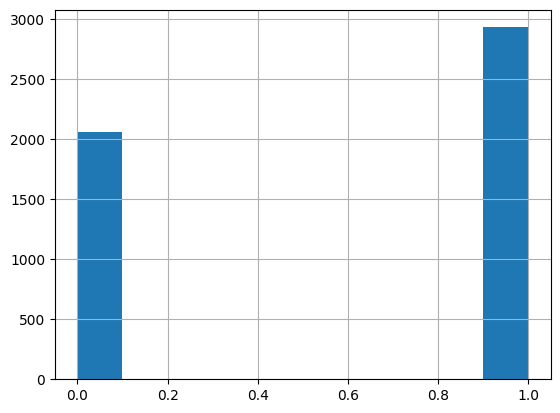

In [5]:
coffee['sentiment'] = coffee['rating'].replace({1:0, 2:0, 3:0, 4:1, 5:1})

# Evaluate the dataset for class imbalance
coffee.sentiment.hist()
print('Positive label proportion: ', coffee.sentiment.mean())



*   Class imbalance is not a concern for this dataframe. Based on the plot above, there is only a slight class imbalance as the positive and negative labels are relatively close.



Create the train and test sets. Split the data using a 70/30 split ratio and initialize a random seed (`random_state`) of 123 for reproducibility.

In [6]:
from sklearn.model_selection import train_test_split

from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.naive_bayes import MultinomialNB

X = coffee['review']
y = coffee['sentiment']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=123)

Define and build a pipeline for Multinomial Naive Bayes classification to predict the rating sentiment.  
The pipeline should do the following on the training data:
- prepare and tokenize the review text
-transform the tokenized text into a TF-IDF-weighted Document Term Matrix
-train the MN Naive Bayes model

In [7]:
coffee_sent = Pipeline([
                    ('vect', CountVectorizer(stop_words = 'english')),
                    ('tfidf', TfidfTransformer()),
                    ('nb', MultinomialNB()),
                    ])

coffee_sent.fit(X_train, y_train)

Pipeline(steps=[('vect', CountVectorizer(stop_words='english')),
                ('tfidf', TfidfTransformer()), ('nb', MultinomialNB())])

**Model** **Performance** **Evaluation** **for the Multinomial Naive Bayes classification model.**





To evaluate the model's performance, I will consider metrics that focus on the performance of the negative sentiment because DeLonghi, the company who makes the coffee maker, is particularly interested in correctly predicting negative reviews.

These metrics include:
*   Precision - To measure the proportion of correctly predicted negative reviews out of all the reviews predicted as negative.
*   Recall/Sensitivity - To evaluate how many of the actual negative reviews were correctly identified by the model.
*   F1 Score
*   Accuracy
*   ROC AUC




In [8]:
pred = coffee_sent.predict(X_test)
pred_prob = coffee_sent.predict_proba(X_test)[:, 1]

print(classification_report(y_test, pred))

fpr, tpr, thresholds = roc_curve(y_test, pred_prob)
precision, recall, thresholds_pr = precision_recall_curve(y_test, pred)

print('ROC AUC: ', auc(fpr, tpr))
print('Precision/Recall AUC: ', auc(precision, recall))

              precision    recall  f1-score   support

         0.0       0.92      0.70      0.79       611
         1.0       0.82      0.96      0.89       889

    accuracy                           0.85      1500
   macro avg       0.87      0.83      0.84      1500
weighted avg       0.86      0.85      0.85      1500

ROC AUC:  0.9302182153581047
Precision/Recall AUC:  0.3100536791009232



**Results & Conclusion**

This is a good model because:

*   Accuracy = 0.85 indicates the model performs well  in correctly predicting both positive and negative sentiments overall.
*   ROC AUC score = 0.93 suggests that the model has a high capacity to distinguish between positive and negative sentiments.

For negative sentiment (0):
*   Precision = 0.92 - suggests that the model is highly precise in predicting negative reviews, with a low proportion of false positives.
*   Recall = 0.70 - the model can identify 70% of negative reviews.
*   The Precision/Recall AUC = 0.31, is lower than expected but the model has a decent predictive value.

Despite a slight class imbalance, the model is effective for sentiment analysis and provides valuable insights into customer feedback, helping DeLonghi identify areas for product improvement.




<hr>